In [ ]:
# ========== 1. IMPORTS ==========
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from src.data.preprocessing import Preprocessor
from src.models.train import TitanicTrainer

# Añadir la carpeta raíz del proyecto al path
sys.path.append(os.path.abspath(".."))

(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


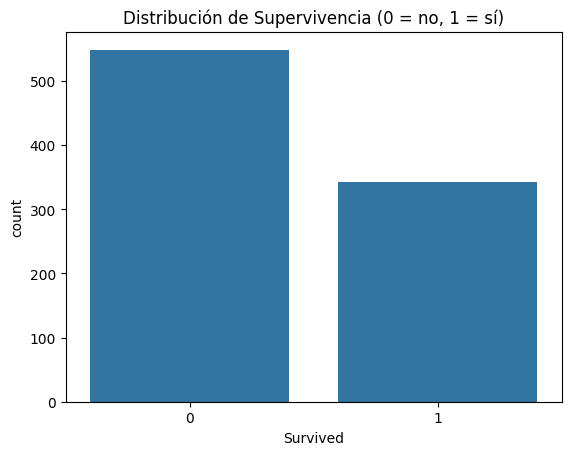

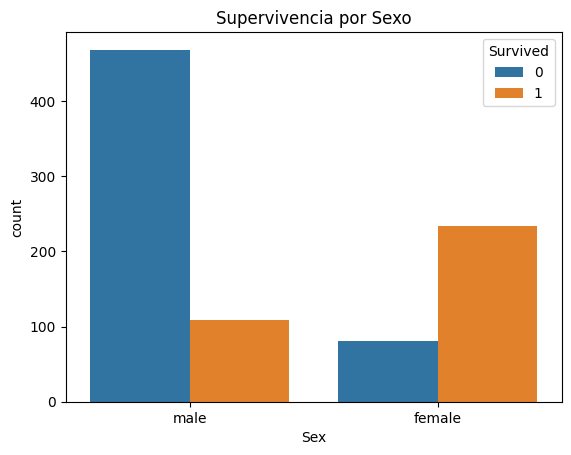

In [ ]:
# ========== 2. CARGAR DATA ==========
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")

print(train.shape)
train.head()

# ========== 3. EDA RÁPIDO ==========
# Valores nulos
print(train.isnull().sum())

# Visualización rápida
sns.countplot(data=train, x="Survived")
plt.title("Distribución de Supervivencia (0 = no, 1 = sí)")
plt.show()

sns.countplot(data=train, x="Sex", hue="Survived")
plt.title("Supervivencia por Sexo")
plt.show()


In [4]:
features = ["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch"]

pre = Preprocessor(features=features)


X = pre.fit_transform(train)
y = train["Survived"]

# Dividir train/val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ========== 5. MODELO BASELINE ==========
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

# ========== 6. MÉTRICAS ==========
acc = accuracy_score(y_val, y_pred)
print("Accuracy:", acc)
print(classification_report(y_val, y_pred))

Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [5]:
# Así queda el código luego de refactorizar el preprocesamiento y el entrenamiento

In [8]:
features = ["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch"]

# Preprocesamiento
pre = Preprocessor(features=features)
X = pre.fit_transform(train)
y = train["Survived"]

# Entrenamiento
trainer = TitanicTrainer()
model, metrics = trainer.train(X, y)

print("Accuracy:", metrics["accuracy"])

# Guardar modelo
trainer.save_model("..//models/titanic_lr.pkl")

# Cargar modelo
loaded_model = TitanicTrainer.load_model("..//models/titanic_lr.pkl")
print("Predicción ejemplo:", loaded_model.predict(X.head(1)))


Accuracy: 0.8100558659217877
✅ Modelo guardado en ..//models/titanic_lr.pkl
Predicción ejemplo: [0]
